### CS 5785 Homework 1
### Ashley Shen (ys778) & Nicole Chussid (njc76)

#### Question #1

In [86]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn import linear_model
import scipy
from scipy.spatial import distance
import random
from sklearn.model_selection import train_test_split
import seaborn as sns



(a)

In [37]:
data_train=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")

In [38]:
data_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
data_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(b)

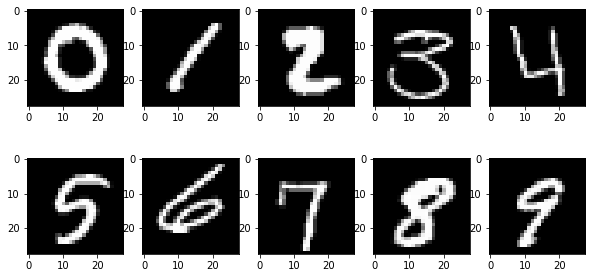

In [40]:
def get_images():
    images = []
    for i in range(0, 10):
        temp = data_train[data_train["label"]==i]
        temp = temp.iloc[0]
        temp= temp.to_numpy()[1:].reshape((28,28))
        images.append(temp)

    plt.figure(figsize=(10,5))
    index=1
    for image in images:
        plt.subplot(2,5, index)
        plt.imshow(image, cmap=plt.cm.gray)
        index += 1
    return 

get_images()

(c)

In [41]:
prob = []
for i in range(10):
    prob.append(len(data_train[data_train['label'] == i])/len(data_train))
pd.DataFrame(prob, columns = ['probability'])

,probability
0,0.098381
1,0.111524
2,0.099452
3,0.103595
4,0.096952
5,0.090357
6,0.098500
7,0.104786
8,0.096738
9,0.099714


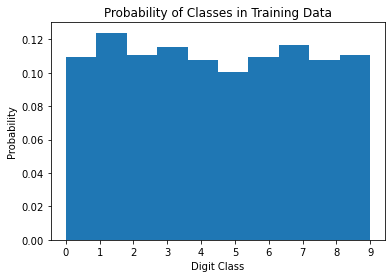

In [42]:
plt.hist(data_train['label'],density=True, bins = 10)
plt.xticks(range(10))
plt.title("Probability of Classes in Training Data")
plt.xlabel("Digit Class")
plt.ylabel("Probability")
plt.show()

(d)

In [43]:
for i in range(10):
    temp = data_train[data_train['label']==i]
    temp = temp.iloc[0]
    temp = data_train[data_train["label"]==i]
    

In [44]:
def best_match(digit,df):
    mainRow = df[df['label']==digit].iloc[0]
    mainRow = mainRow[1:].to_numpy()
    distance=[]
    for row in df.values:
        eachRow = row[1:]
        # calculating euclidean distanve
        dist=np.linalg.norm(mainRow - eachRow)
#         print("dist is", dist)
        distance.append(dist)
#     print(distance)
    min_index = distance.index(min(distance[1:]))
    match_label = df.iloc[min_index].label
    
#     print(min_index)
    print(distance[1])
    return [digit,match_label]
#         min_distance = min
    
pairs = []
for i in range(10):
    pairs.append(best_match(i,data_train))
print("Best match for each example digit",pairs)

0.0
3307.6387348076573
2892.0926679482454
3149.364856602042
3043.9461230448874
3194.1019082051844
3097.9170421429944
3029.5129971663764
3392.539167054671
3293.681526802493
Best match for each example digit [[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9]]


(e)

In [114]:
df_0 = data_train.loc[data_train['label'] == 0].drop(['label'], axis = 1).to_numpy()
df_1 = data_train.loc[data_train['label'] == 1].drop(['label'], axis = 1).to_numpy()
df_1 = data_train.loc[data_train['label'] == 1].drop(['label'], axis = 1).to_numpy()

In [115]:
pwd_00= sklearn.metrics.pairwise_distances(df_0, Y=df_0, metric='euclidean')
pwd_00=sklearn.preprocessing.normalize(pwd_00, norm='l2',axis=1, copy=True, return_norm=False)
print(len(pwd_00))

pwd_10= sklearn.metrics.pairwise_distances(df_1, Y=df_0, metric='euclidean')
pwd_10=sklearn.preprocessing.normalize(pwd_10, norm='l2',axis=1, copy=True, return_norm=False)
pwd_10=pwd_10[:4132]
print(len(pwd_10))

pwd_11= sklearn.metrics.pairwise_distances(df_1, Y=df_1, metric='euclidean')
pwd_11=sklearn.preprocessing.normalize(pwd_11, norm='l2',axis=1, copy=True, return_norm=False)
pwd_11=pwd_11[:4132]
print(len(pwd_11))

4132
4132
4132


Text(0.5, 1.0, 'Histogram for Genuine Matches and Imposter Matches')

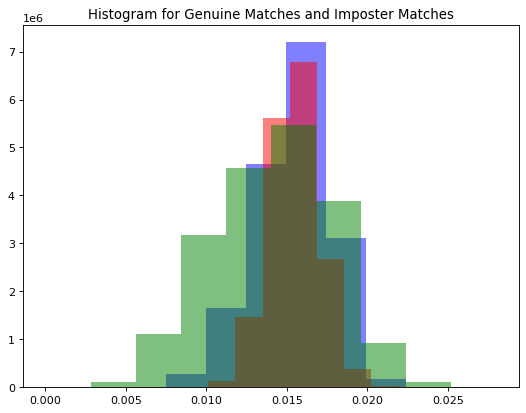

In [119]:
# pair_distance.flatten()
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(pwd_00.flatten(), alpha=0.5,lw=1,color='b')
plt.hist(pwd_10.flatten(), alpha=0.5,lw=1,color='r')
plt.hist(pwd_11.flatten(), alpha=0.5,lw=1,color='g')
plt.title("Histogram for Genuine Matches and Imposter Matches")


(f)

In [120]:
distances= pwd_00.flatten() + pwd_10.flatten() + pwd_11.flatten()

ValueError: operands could not be broadcast together with shapes (17073424,) (19354288,) 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


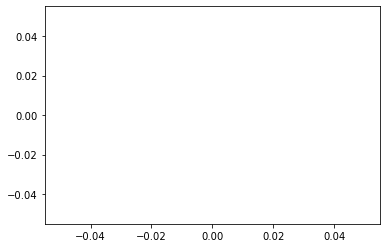

In [117]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(([0]*len(pwd_00)), pwd_00[0])
plt.plot(fpr,tpr)

In [84]:
sklearn.metrics.RocCurveDisplay(fpr, tpr)

TypeError: __init__() takes 1 positional argument but 3 were given

In [135]:
df= data_train.loc[(data_train['label'] == 1) | (data_train['label'] == 0)]
pwd_df= sklearn.metrics.pairwise_distances(df, df, Y=None, metric='euclidean')
pwd_df=pwd_df.flatten()
print(len(pwd_df))
pwd_df

77721856


array([   0.        , 3307.63888597, 2217.55225418, ..., 1279.90273068,
       2812.22011941,    0.        ])

In [134]:
match_array= [0]*len(pwd_01) + [1]*len(pwd_00) + [1]*len(pwd_11)
print(len(match_array))

12948


In [196]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(pwd__00, [0]*len(pwd_00))
plot(fpr,tpr)
plot([0,1],[0,1])
xlabel('fpr')
ylabel('tpr')

NameError: name 'pwd__00' is not defined

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_pred = model.predict(X_test_data)
roc_auc_score(y_true, y_pred)

(g)

In [68]:
# print(data_train.iloc[0][1:].to_numpy().shape(28,28))

# x = data_train[data_train['label']==0].iloc[0]
# y = data_train[data_train['label']==0].iloc[1:]

def bestMatchRows(df,row1,K):
    distance=[]
    for index,row in enumerate(df.values):
        eachRow = row[1:]
        # calculating euclidean distanve
#         eachRow = row1
        dist=np.linalg.norm(row1 - eachRow) 
        distance.append((index,dist,df.iloc[index].label))
    
    distance.sort(key=lambda tup: tup[1])
    neighbors = []
    for i in range(K):
        neighbors.append(distance[i])
    
    return neighbors




In [71]:
neighbors

NameError: name 'neighbors' is not defined

In [69]:
# def makePrediction(numNeighbors,trainData,testRow):
#     neighbors = bestMatchRows(trainData, testRow, numNeighbors)
#     distanceVals = [row[-1] for row in neighbors]
#     myPrediction = max(set(distanceVals), key=distanceVals.count)
#     return (myPrediction)
def makePrediction(numNeighbors,trainData,testRow):
    realLabel = testRow.label
    testRow = testRow[1:]
    neighbors = bestMatchRows(trainData, testRow, numNeighbors)
    distanceVals = [row[-1] for row in neighbors]
    myPrediction = max(set(distanceVals), key=distanceVals.count)
    return ([myPrediction,realLabel])



# Generate some random test rows
testRow1 = data_train.iloc[500]


K = 5 #Set K value for KNN

myPrediction1 = makePrediction(K,data_train,testRow1)


print("My prediction is",myPrediction1[0]," expected",myPrediction1[1])


# print("nearest neighbors are",neighbors)

actualLabel = data_train.iloc[neighbors[0][0]].label

for index,value in neighbors:
    if actualLabel == data_train.iloc[index].label:
        print("INDEX",index,"with error value",value,"is CORRECT in identifying the label")
    else:
        print("INDEX",index,"with error value",value,"is INCORRECT in identifying the label")
neighbors

My prediction is 6  expected 6


NameError: name 'neighbors' is not defined

In [22]:
type(testRow1)

pandas.core.series.Series

In [23]:
print("My prediction is",myPrediction1[0]," expected",myPrediction1[1])

My prediction is 6  expected 6


In [167]:
training_data, testing_data = train_test_split(data_train.sample(5000), test_size=0.5, random_state=25)


In [168]:
# k = 2
training_data.reset_index(drop=True)
correct = 0
i = 0
for i in range(len(training_data)):
    row = training_data.iloc[i]
    prediction = makePrediction(4,training_data,row)
    if prediction[0]==prediction[1]:
        correct += 1
    i += 1
accuracy = correct/len(training_data)
print(accuracy)

KeyboardInterrupt: 

In [ ]:
# k = 3 
training_data.reset_index(drop=True)
correct = 0
i = 0
for i in range(len(training_data)):
    row = training_data.iloc[i]
    prediction = makePrediction(3,training_data,row)
    if prediction[0]==prediction[1]:
        correct += 1
    i += 1

In [ ]:
accuracy = correct/len(training_data)
print(accuracy)

In [ ]:
# k = 4 
training_data.reset_index(drop=True)
correct = 0
i = 0
for i in range(len(training_data)):
    row = training_data.iloc[i]
    prediction = makePrediction(4,training_data,row)
    if prediction[0]==prediction[1]:
        correct += 1
    i += 1
accuracy = correct/len(training_data)
print(accuracy)

In [ ]:
# k = 5 
training_data.reset_index(drop=True)
correct = 0
i = 0
for i in range(len(training_data)):
    row = training_data.iloc[i]
    prediction = makePrediction(5,training_data,row)
    if prediction[0]==prediction[1]:
        correct += 1
    i += 1
accuracy = correct/len(training_data)
print(accuracy)

In [ ]:
data_train.sample(30)

In [ ]:
# test on the testing dataset 
correct = 0
i = 0
true = []
pred = []
for i in range(len(testing_data)):
    row = training_data.iloc[i]
    prediction = makePrediction(3,training_data,row)
    true.append(prediction[1])
    pred.append(prediction[0])
    if prediction[0]==prediction[1]:
        correct += 1
    i += 1
accuracy = correct/len(training_data)
print(accuracy)


#### Question #2

In [173]:
data_train=pd.read_csv("titanic_train.csv")
data_test=pd.read_csv("titanic_test.csv")
# briefly summarize training dataset 
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [174]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, '#')

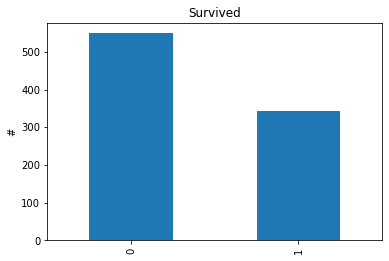

In [175]:
# analyze the dataset and visualize all the features to see which ones will be used for logistic regression 

# overall survived vs. died 
fig=plt.figure()
# plt.subplot2grid((2,3),(0,0))
data_train.Survived.value_counts().plot(kind="bar")
plt.title(u"Survived")
plt.ylabel(u"#")

Text(0, 0.5, '#')

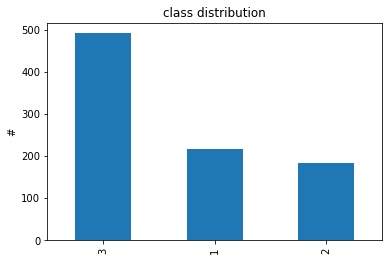

In [176]:
# data visualization of class distribution 
data_train.Pclass.value_counts().plot(kind="bar")
plt.title(u"class distribution")
plt.ylabel(u"#")

Text(0.5, 0, 'age')

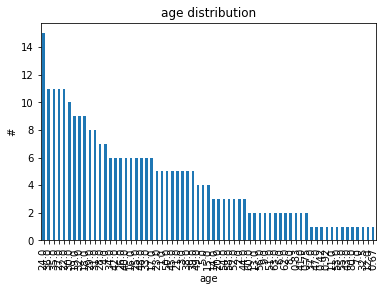

In [177]:
# data visualization of the age distribution 
survived = data_train[data_train['Survived'] == 1]
survived.Age.value_counts().plot(kind = 'bar')
plt.title(u"age distribution")
plt.ylabel(u"#")
plt.xlabel(u"age")

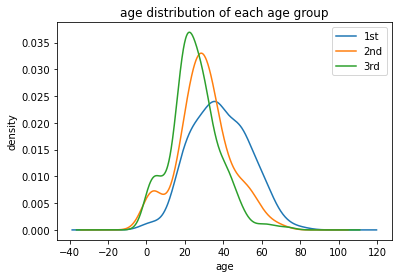

In [178]:
# age distribution among each age group
data_train.Age[data_train.Pclass==1].plot(kind="kde")
data_train.Age[data_train.Pclass==2].plot(kind="kde")
data_train.Age[data_train.Pclass==3].plot(kind="kde")
plt.xlabel(u"age")
plt.ylabel(u"density")
plt.title(u"age distribution of each age group")
plt.legend((u"1st",u"2nd",u"3rd"),loc="best")

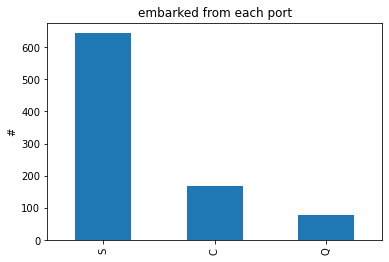

In [179]:
# visualization of the embarkment from different location 
data_train.Embarked.value_counts().plot(kind="bar")
plt.title(u"embarked from each port")
plt.ylabel(u"#")
plt.show()

<Figure size 432x288 with 0 Axes>

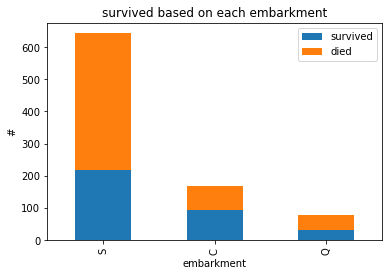

In [180]:
# the survival situation based on the embarkment 
fig=plt.figure()

survived = data_train.Embarked[data_train.Survived == 1].value_counts()
died = data_train.Embarked[data_train.Survived == 0].value_counts()
df=pd.DataFrame({u'survived':survived,u'died':died})
df.plot(kind="bar",stacked=True)
plt.title(u'survived based on each embarkment')
plt.xlabel(u'embarkment')
plt.ylabel(u'#')
plt.show()

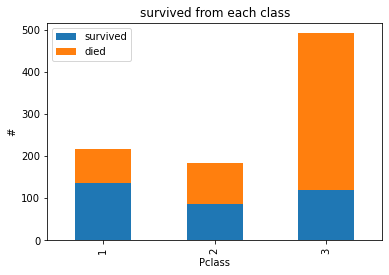

In [181]:
# the survival rate from each class
survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'survived':survived_1, u'died':survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"survived from each class")
plt.xlabel(u"Pclass") 
plt.ylabel(u"#") 
plt.show()


<Figure size 432x288 with 0 Axes>

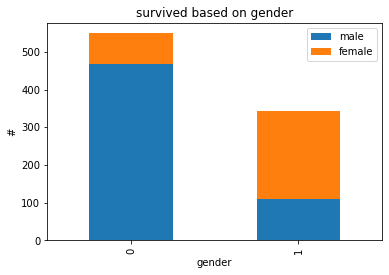

In [182]:
#gender and survival 
fig=plt.figure()

survived_male=data_train.Survived[data_train.Sex == 'male'].value_counts()
survived_female=data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'male':survived_male,u'female':survived_female})
df.plot(kind="bar",stacked=True)
plt.title(u'survived based on gender')
plt.xlabel(u'gender')
plt.ylabel(u'#')
plt.show()

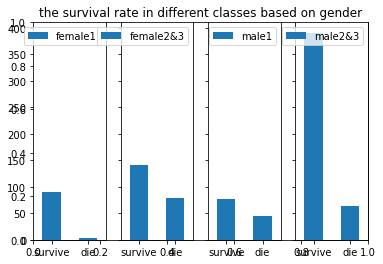

In [183]:
# the survival rate of male and female in differnet classes
fig=plt.figure()
plt.title(u'the survival rate in different classes based on gender')
fig1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 1].value_counts().plot(kind="bar",label="female1")
fig1.set_xticklabels([u'survive',u'die'],rotation=0)
fig1.legend([u'female1'],loc='best')
          
fig2=fig.add_subplot(142,sharey=fig1)
data_train.Survived[data_train.Sex=='female'][data_train.Pclass!=1].value_counts().plot(kind="bar",label="female2&3")
fig2.set_xticklabels([u'survive',u'die'],rotation=0)
fig2.legend([u'female2&3'],loc='best')

fig3=fig.add_subplot(143,sharey=fig1)
data_train.Survived[data_train.Sex=='male'][data_train.Pclass==1].value_counts().plot(kind="bar",label="male1")
fig3.set_xticklabels([u'survive',u'die'],rotation=0)
fig3.legend([u'male1'],loc='best')

fig4=fig.add_subplot(144,sharey=fig1)
data_train.Survived[data_train.Sex=='male'][data_train.Pclass!=1].value_counts().plot(kind="bar",label="male2&3")
fig4.set_xticklabels([u'survive',u'die'],rotation=0)
fig4.legend([u'male2&3'],loc='best')

<Figure size 432x288 with 0 Axes>

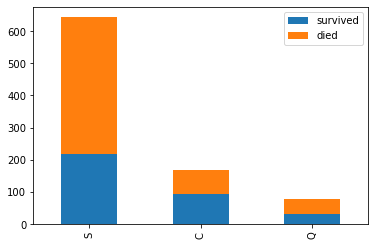

In [184]:
# the relationship between the port and the survival rate 
fig=plt.figure()
survived=data_train.Embarked[data_train.Survived==1].value_counts()
died=data_train.Embarked[data_train.Survived==0].value_counts()
df=pd.DataFrame({u'survived':survived,u'died':died})
df.plot(kind="bar",stacked="true")

In [185]:
# the relationship between the number of siblings and survival. 
group=data_train.groupby(['SibSp','Survived'])
df=pd.DataFrame(group.count()['PassengerId'])
print (df)

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7


In [186]:
# the relationship between the number of parents, and survival. 
group=data_train.groupby(['Parch','Survived'])
df=pd.DataFrame(group.count()['PassengerId'])
print (df)

                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1


In [187]:
#the relationship between the cabin and the survival rate
data_train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
F33            3
              ..
C103           1
C62 C64        1
B42            1
D9             1
E12            1
Name: Cabin, Length: 147, dtype: int64

<Figure size 432x288 with 0 Axes>

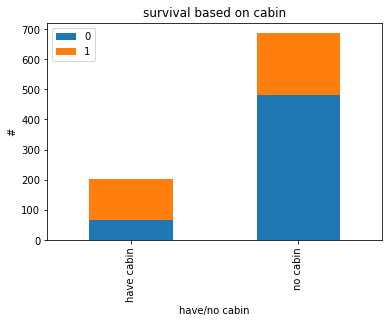

In [188]:
# data visualizatin of the survival based on the cabin 
fig=plt.figure()
survived_cabin=data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
survived_nocabin=data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({u'have cabin':survived_cabin,u'no cabin':survived_nocabin}).transpose()
df.plot(kind="bar",stacked=True)
plt.title(u'survival based on cabin')
plt.xlabel(u'have/no cabin')
plt.ylabel(u'#')
plt.show()

### Reasoning for picked features 

I picked Pclass as a feature because from the graph, we can tell that people from the first class are more likely to survive whereas the death rate on the 3rd class is really high. I also picked sex as a feature because the graph clearly says that male has a higher death rate and female has a higher survival rate. I also picked age as a feature because it’s obvious that younger people were more likely to survive. I picked SibSp because people who didn’t spouses or sibling were more likely die. And I picked parents as a feature as well because from the analysis, people who didn’t have parents with them were more like to die. I picked Embarked from the graph we can tell that people who embarked from S were way more likely to survive. I chose embarked as a feature because S had the most people embarked from and had the highest survival rate among all, which might also be insightful. I didn’t drop Cabin because from the graph we can that people who didn’t have a cabin on record were more likely to die. Even though we didn’t have that many cabin data available, I believe it can still provide useful information. 

However, I didn’t pick name as a feature, because everyone has different names and it’s hard to see a trend from such a broad of names. Also I didn’t pick ticket because the data input in that column is very diverse and I couldn’t tell a pattern. 

In [32]:
data_train = pd.read_csv("titanic_train.csv")
data_test = pd.read_csv("titanic_test.csv")

def format_data(df, train_=True):
    #Feature Engineering
    df["Age"] = df["Age"].fillna(df["Age"].mean())
    df["Fare"] = df["Fare"].fillna(df["Fare"].mean())
    df["Cabin_"] = df["Cabin"].notnull()
    df = df.drop(columns=["Cabin", "Ticket", "Name"])

    #Normalizing numerical features
    scaler=preprocessing.StandardScaler()
    df['age_norm'] = scaler.fit_transform(df[['Age']], scaler.fit(df[['Age']]))
    df['fare_norm'] = scaler.fit_transform(df[['Fare']], scaler.fit(df[['Fare']]))

    #Getting the dummy dfs
    sex = pd.get_dummies(df["Sex"])
    embarked = pd.get_dummies(df["Embarked"])
    cabin = pd.get_dummies(df["Cabin_"])
    pclass = pd.get_dummies(df["Pclass"])
   
    #Concatting the dummy dfs together
    if train_ == True:
        df =df[["Survived", "age_norm", "SibSp", "Parch", "fare_norm"]]
        df = pd.concat([df, sex, embarked, cabin, pclass],axis=1)
    else:
        df = df[["age_norm", "SibSp", "Parch", "fare_norm"]]
        df = pd.concat([df, sex, embarked, cabin, pclass],axis=1)
        df
    return df

#Train logistic model
train = format_data(data_train, train_=True)
train
x = train.drop(columns=["Survived"])
y = train[["Survived"]]
clf = linear_model.LogisticRegression().fit(x, y)

#Formatting test data 
test = format_data(data_test, train_=False)
predictions = clf.predict(test)
test = pd.read_csv("Test.csv")
test["Survived"] = predictions
test[["PassengerId", "Survived"]].to_csv("result.csv", index=False)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ValueError: Length of values does not match length of index

### Written Exercises

#### Question 1: